In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tweet_classifier import TweetClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/test_code_modeling.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          7613 non-null   int64 
 1   hashtags        7613 non-null   int64 
 2   mentions        7613 non-null   int64 
 3   urls            7613 non-null   int64 
 4   key_txt_vector  7613 non-null   object
dtypes: int64(4), object(1)
memory usage: 356.9+ KB


### Pipeline

In [3]:
def parse_vector(s):
    return np.fromstring(s.strip("[]"), sep=" ")

def prepare_data(path):
    df = pd.read_csv(path, index_col=0)
    text_vectors = np.vstack(df["key_txt_vector"].apply(parse_vector).values)
    numeric_features = df.select_dtypes(include=[np.number]).drop(columns=["target"]).to_numpy()
    scaler = StandardScaler()
    numeric_scaled = scaler.fit_transform(numeric_features)
    X = np.hstack([text_vectors, numeric_scaled])
    y = df["target"].values
    return X, y

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n==== {name} ====")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring="f1",
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(8,5))
    plt.plot(N, train_score.mean(axis=1), label="Train")
    plt.plot(N, val_score.mean(axis=1), label="Validation")
    plt.title(f"Courbe d'apprentissage - {name}")
    plt.xlabel("Taille d'entraînement")
    plt.ylabel("F1 score")
    plt.legend()
    plt.grid(True)
    plt.show()

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

/tmp/ipykernel_68587/3229885519.py:2: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(s.strip("[]"), sep=" ")



==== LogisticRegression ====
[[726 148]
 [505 144]]
              precision    recall  f1-score   support

           0       0.59      0.83      0.69       874
           1       0.49      0.22      0.31       649

    accuracy                           0.57      1523
   macro avg       0.54      0.53      0.50      1523
weighted avg       0.55      0.57      0.53      1523



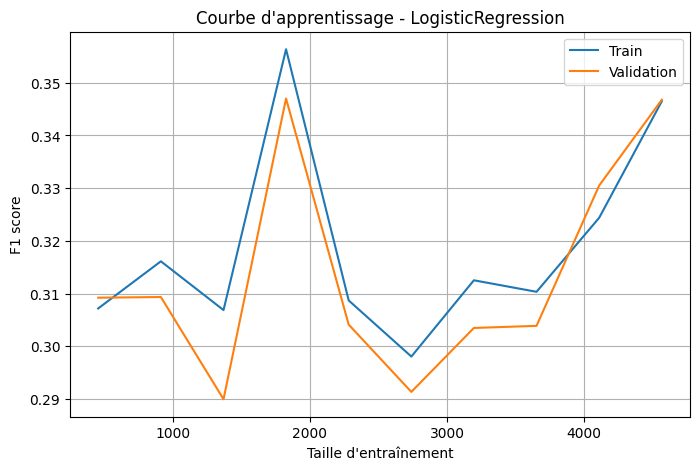


==== DecisionTree ====
[[645 229]
 [317 332]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       874
           1       0.59      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.62      0.63      1523
weighted avg       0.64      0.64      0.64      1523



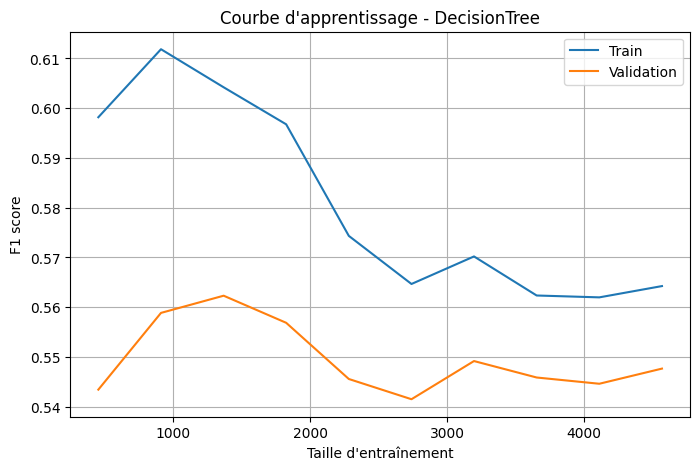


==== RandomForest ====
[[641 233]
 [316 333]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       874
           1       0.59      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.62      0.62      1523
weighted avg       0.64      0.64      0.64      1523



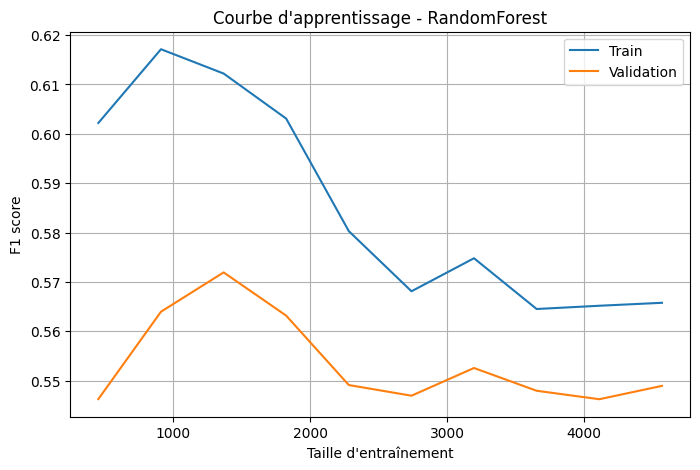


==== SVM ====
[[678 196]
 [330 319]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       874
           1       0.62      0.49      0.55       649

    accuracy                           0.65      1523
   macro avg       0.65      0.63      0.63      1523
weighted avg       0.65      0.65      0.65      1523



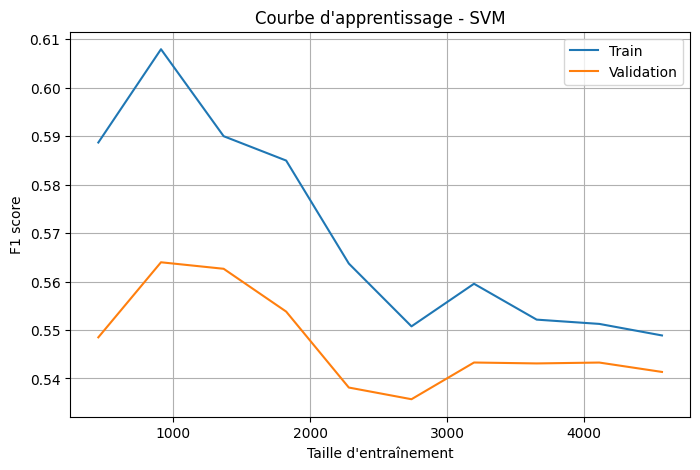


==== XGBoost ====
[[647 227]
 [315 334]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       874
           1       0.60      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.63      0.63      1523
weighted avg       0.64      0.64      0.64      1523



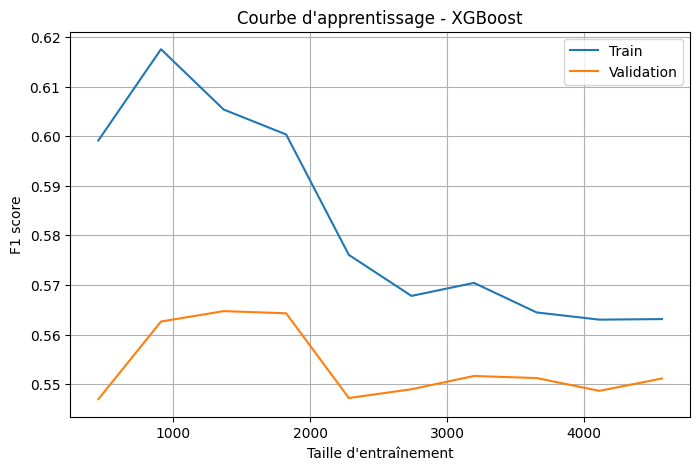

In [4]:
X, y = prepare_data("../data/test_code_modeling.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

In [ ]:
# model_names = [
#     "logistic_regression",
#     "decision_tree",
#     "random_forest",
#     "svm",
#     "xgboost"
# ]

In [ ]:
# clf_temp = TweetClassifier()
# X, y = clf_temp.prepare_features(df)
# results = {}

# for model_name in model_names:
#     print(f"\n=== {model_name.upper()} ===")
#     clf = TweetClassifier(model_name)
#     clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
#     results[model_name] = score
#     print(f"Accuracy : {score:.4f}")

# print("\nRésumé des performances :", results)


=== LOGISTIC_REGRESSION ===
[[726 148]
 [505 144]]
              precision    recall  f1-score   support

           0       0.59      0.83      0.69       874
           1       0.49      0.22      0.31       649

    accuracy                           0.57      1523
   macro avg       0.54      0.53      0.50      1523
weighted avg       0.55      0.57      0.53      1523

Accuracy : 0.5712

=== DECISION_TREE ===
[[645 229]
 [317 332]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       874
           1       0.59      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.62      0.63      1523
weighted avg       0.64      0.64      0.64      1523

Accuracy : 0.6415

=== RANDOM_FOREST ===


[[641 233]
 [316 333]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       874
           1       0.59      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.62      0.62      1523
weighted avg       0.64      0.64      0.64      1523

Accuracy : 0.6395

=== SVM ===
[[678 196]
 [330 319]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       874
           1       0.62      0.49      0.55       649

    accuracy                           0.65      1523
   macro avg       0.65      0.63      0.63      1523
weighted avg       0.65      0.65      0.65      1523

Accuracy : 0.6546

=== XGBOOST ===
[[647 227]
 [315 334]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       874
           1       0.60      0.51      0.55       649

    accuracy                           0.64    